# Mini Project2 2025

### Install the Hugging Face Datasets library

In [1]:
!pip install datasets

### Load Dataset

In [2]:
# dataset fetched from https://huggingface.co/datasets/nocode-ai/imdb-movie-reviews
from datasets import load_dataset

ds = load_dataset("nocode-ai/imdb-movie-reviews")

In [3]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment'],
        num_rows: 50000
    })
})


### Import Necessary Libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



### Convert Hugging Face DatasetDict object to Pandas Dataframe

In [5]:
data = ds['train']

df = pd.DataFrame(data)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Download Stopwords Package 

In [7]:
# Download stopwords 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/tesfay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Preprocessing

In [8]:
# Data Preprocessing
def clean_text(text):
    text = text.lower()  
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z ]", "", text)  # Remove special characters and numbers
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [9]:
df['cleaned_review'] = df['review'].apply(clean_text)

# Insert the 'cleaned_review' column to the right of the 'review' column
df.insert(df.columns.get_loc('review') + 1, 'cleaned_review', df.pop('cleaned_review'))

df.head()

,review,cleaned_review,sentiment
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,positive
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,positive


### Train-Test Split and Test-to-Numrical Conversion

In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text into numerical features using TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"{X_train.head()} \n")
print(f"{X_test.head()} \n")
print(f"{y_train.head()} \n")
print(f"{y_test.head()} \n")


39087    thats kept asking many fights screaming matche...
30893    watch entire movie could watch entire movie st...
45278    touching love story reminiscent mood love draw...
16398    latterday fulci schlocker totally abysmal conc...
13653    first firmly believe norwegian movies continua...
Name: cleaned_review, dtype: object 

33553    really liked summerslam due look arena curtain...
9427     many television shows appeal quite many differ...
199      film quickly gets major chase scene ever incre...
12447    jane austen would definitely approve onegwynet...
39489    expectations somewhat high went see movie thou...
Name: cleaned_review, dtype: object 

39087    negative
30893    negative
45278    positive
16398    negative
13653    negative
Name: sentiment, dtype: object 

33553    positive
9427     positive
199      negative
12447    positive
39489    negative
Name: sentiment, dtype: object 



In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000,) (10000,) (40000,) (10000,)


## Models

### Model 1. Logistic Regression

In [12]:
# Model 1: Logistic Regression 

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy: 0.8879
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Model 2: Naïve Bayes

In [13]:
# Model 2: Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy: 0.8508
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Model 3: Gradient Boosting

In [15]:
# Model 3: Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_tfidf)

# Evaluate model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy: 0.8284
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.81      0.82      4961
    positive       0.82      0.85      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



### Results Comparison 

#### Learning Curves

In [20]:
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
    plt.plot(train_sizes, test_mean, label='Validation Score', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


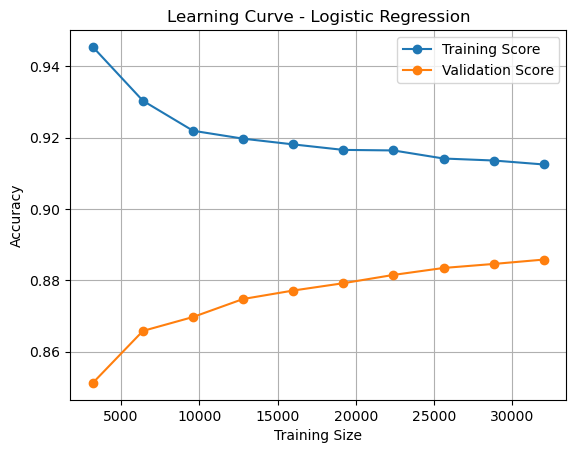

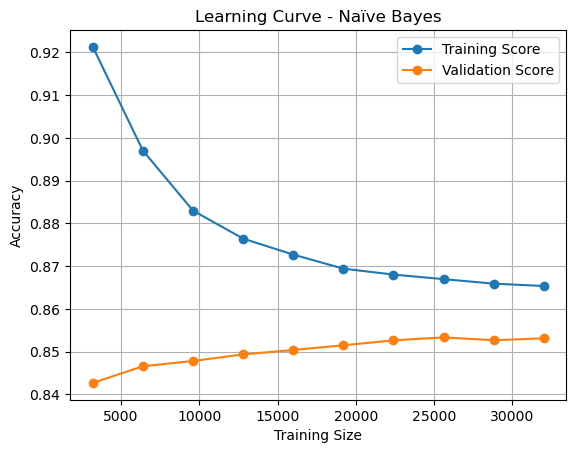

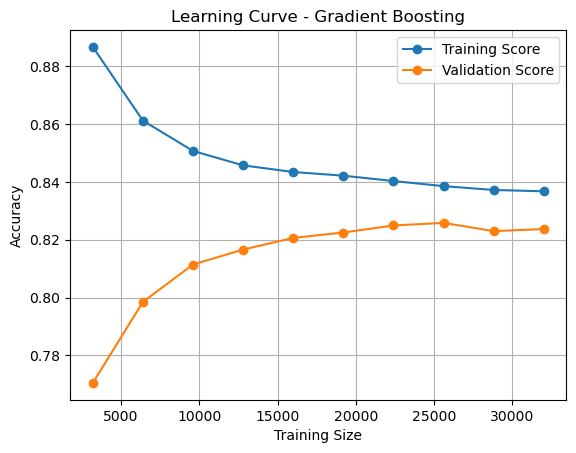

In [21]:
# Plot learning curves
plot_learning_curve(LogisticRegression(), X_train_tfidf, y_train, 'Learning Curve - Logistic Regression')
plot_learning_curve(MultinomialNB(), X_train_tfidf, y_train, 'Learning Curve - Naïve Bayes')
plot_learning_curve(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42), X_train_tfidf, y_train, 'Learning Curve - Gradient Boosting')


#### Accuracy Comparison Bar Graph

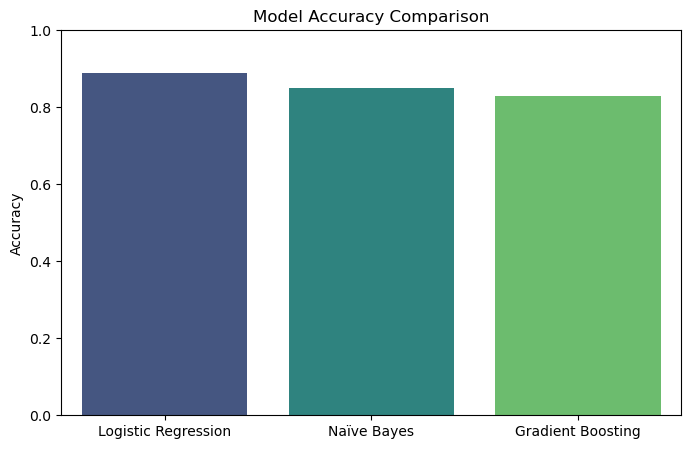

In [22]:
# Define models and accuracies correctly
models = ['Logistic Regression', 'Naïve Bayes', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_gb)  # Ensure correct variable
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, hue=models, palette='viridis', legend=False)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


#### Confusion Matrices

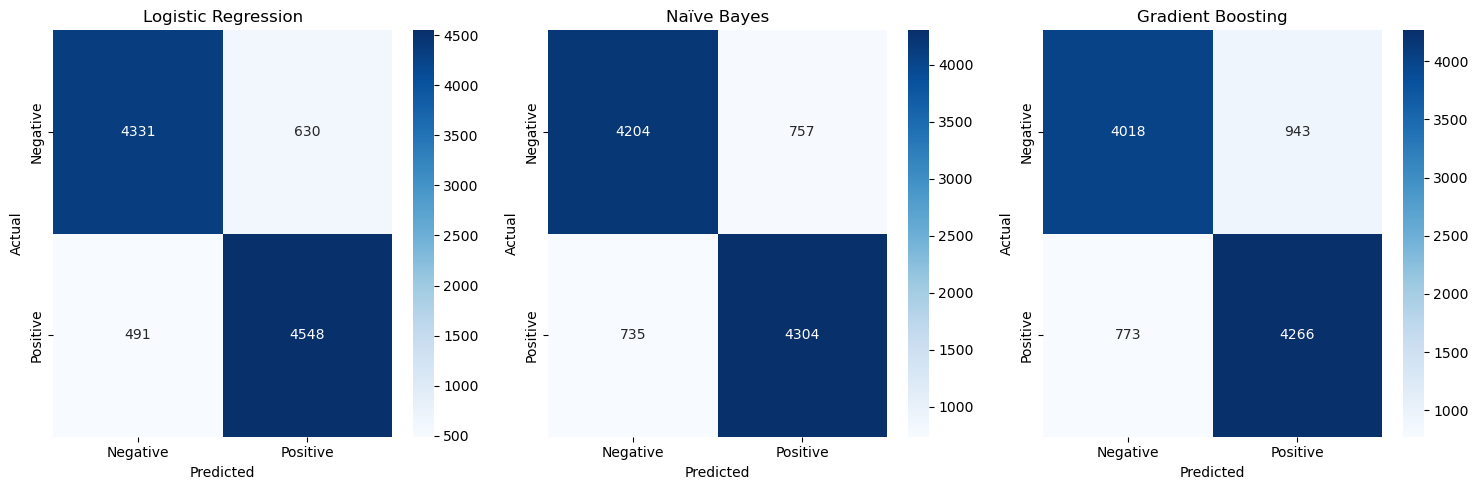

In [23]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define custom labels (Instead of 0 or 1)
labels = ["Negative", "Positive"]

for i, (model_name, y_pred) in enumerate(zip(models, [y_pred_lr, y_pred_nb, y_pred_gb])):
    cm = confusion_matrix(y_test, y_pred)
    
    # Convert to DataFrame with labeled rows and columns
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    # Plot the confusion matrix
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


#### Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric 
y_test_encoded = label_encoder.fit_transform(y_test)  

y_pred_lr_encoded = label_encoder.transform(y_pred_lr)   
y_pred_gb_encoded = label_encoder.transform(y_pred_gb)
y_pred_nb_encoded = label_encoder.transform(y_pred_nb)


#### ROC Curve 

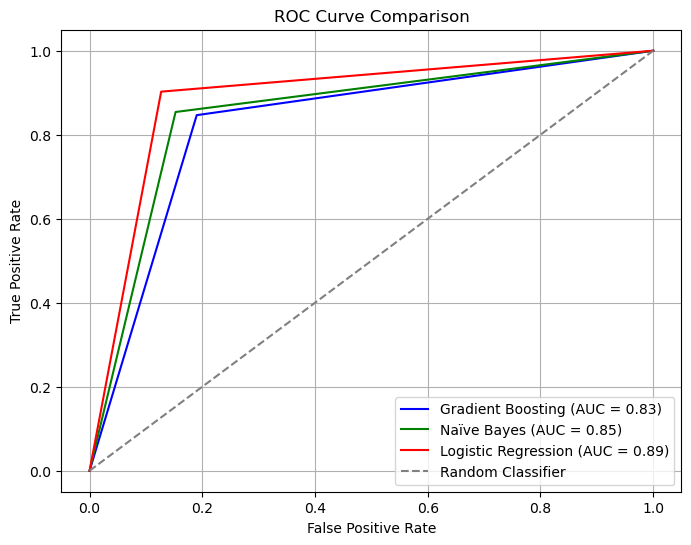

In [26]:
from sklearn.metrics import roc_curve, auc

# Compute ROC Curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_encoded, y_pred_lr_encoded)
auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC Curve and AUC for Naïve Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_encoded, y_pred_nb_encoded)
auc_nb = auc(fpr_nb, tpr_nb)

# Compute ROC Curve and AUC for Gradient Boosting 
fpr_gb, tpr_gb, _ = roc_curve(y_test_encoded, y_pred_gb_encoded)  
auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})', color='blue')
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {auc_nb:.2f})', color='green')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='red')

# Plot Random Classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")

# Labels and Legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()
